In [ ]:
import tensorflow as tf
import zipfile, os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!kaggle datasets download -d kapillondhe/american-sign-language

Dataset URL: https://www.kaggle.com/datasets/kapillondhe/american-sign-language
License(s): GPL-2.0
100% 4.63G/4.64G [01:13<00:00, 98.3MB/s]
100% 4.64G/4.64G [01:13<00:00, 67.9MB/s]


In [ ]:
# install and import special package
!pip install split-folders
import splitfolders

In [ ]:
!unzip /content/american-sign-language.zip

Streaming output truncated to the last 5000 lines.
  inflating: ASL_Dataset/Train/Z/1897.jpg  
  inflating: ASL_Dataset/Train/Z/1898.jpg  
  inflating: ASL_Dataset/Train/Z/1899.jpg  
  inflating: ASL_Dataset/Train/Z/19.jpg  
  inflating: ASL_Dataset/Train/Z/190.jpg  
  inflating: ASL_Dataset/Train/Z/1900.jpg  
  inflating: ASL_Dataset/Train/Z/1901.jpg  
  inflating: ASL_Dataset/Train/Z/1902.jpg  
  inflating: ASL_Dataset/Train/Z/1903.jpg  
  inflating: ASL_Dataset/Train/Z/1904.jpg  
  inflating: ASL_Dataset/Train/Z/1905.jpg  
  inflating: ASL_Dataset/Train/Z/1906.jpg  
  inflating: ASL_Dataset/Train/Z/1907.jpg  
  inflating: ASL_Dataset/Train/Z/1908.jpg  
  inflating: ASL_Dataset/Train/Z/1909.jpg  
  inflating: ASL_Dataset/Train/Z/191.jpg  
  inflating: ASL_Dataset/Train/Z/1910.jpg  
  inflating: ASL_Dataset/Train/Z/1911.jpg  
  inflating: ASL_Dataset/Train/Z/1912.jpg  
  inflating: ASL_Dataset/Train/Z/1913.jpg  
  inflating: ASL_Dataset/Train/Z/1914.jpg  
  inflating: ASL_Dataset/Trai

In [ ]:
# remove 'nothing' and 'space' labels from datasets
dirData = '/content/ASL_Dataset'
dataType = ['Test', 'Train']
delClass = ['Nothing', 'Space']

for i in range(2):
    temp = os.path.join(dirData, dataType[i])
    for j in range(2):
        temp2 = os.path.join(temp, delClass[j])
        try:
            shutil.rmtree(temp2)
        except:
            pass

In [ ]:
# rename folder 'Train' into 'input'
try:
    os.rename(os.path.join(dirData, dataType[1]),
              os.path.join(dirData, 'input'))
except OSError:
    pass

In [ ]:
# split data training into two folders, named 'train' and 'val'
try:
    splitfolders.ratio(os.path.join(dirData, 'input'),
                       output = os.path.join(dirData, 'output'),
                       ratio = (0.55, 0.45))
except:
    pass

Copying files: 153788 files [02:26, 1047.68 files/s]


In [ ]:
# delete the folder named 'input'
try:
    shutil.rmtree(os.path.join(dirData, 'input'))
except:
    pass

In [ ]:
# move folder named 'test' and 'val'
folderType = ['train', 'val']
dataType = ['Train', 'Val']

try:
    for i in range(2):
        temp = os.path.join(dirData, 'output')
        os.rename(os.path.join(temp, folderType[i]),
                  os.path.join(dirData, dataType[i]))
    shutil.rmtree(os.path.join(dirData, 'output'))
except:
    pass

In [ ]:
dirTrain = os.path.join(dirData, 'Train')
dirVal = os.path.join(dirData, 'Val')

In [ ]:
if os.listdir(dirTrain) == os.listdir(dirVal):
    labels = os.listdir(dirTrain)
labels

['E',
 'L',
 'Z',
 'Y',
 'X',
 'B',
 'A',
 'S',
 'R',
 'O',
 'C',
 'V',
 'P',
 'W',
 'D',
 'Q',
 'N',
 'U',
 'G',
 'K',
 'M',
 'J',
 'F',
 'I',
 'H',
 'T']

In [ ]:
# settings new images for data training
setTrain = ImageDataGenerator()

# settings new images for data validation
setVal = ImageDataGenerator()

In [ ]:
# generate new images for data training
genTrain = setTrain.flow_from_directory(dirTrain,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        class_mode = 'sparse',
                                        seed = 250)

# generate new images for data validation
genVal = setVal.flow_from_directory(dirVal,
                                    target_size = (224, 224),
                                    batch_size = 32,
                                    class_mode = 'sparse',
                                    seed = 250)
# does the label match? good!
if genTrain.class_indices == genVal.class_indices:
    print(genTrain.class_indices)

Found 84565 images belonging to 26 classes.
Found 69223 images belonging to 26 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [ ]:
inputSize = (224, 224, 3)  # Input shape for the model

base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=inputSize)
# layer = base_model.get_layer('conv_pw_13_relu')

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(26, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(genTrain,
          batch_size = 32,
          steps_per_epoch = 32,
          epochs = 10,
          validation_data = genVal,
          validation_steps = 2)

Epoch 1/10
32/32 [==============================] - 212s 6s/step - loss: 1.7390 - accuracy: 0.5771 - val_loss: 1.7092 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 195s 6s/step - loss: 0.1380 - accuracy: 0.9580 - val_loss: 0.3088 - val_accuracy: 0.9062
Epoch 3/10
32/32 [==============================] - 193s 6s/step - loss: 0.0649 - accuracy: 0.9814 - val_loss: 0.2207 - val_accuracy: 0.9375
Epoch 4/10
32/32 [==============================] - 189s 6s/step - loss: 0.0246 - accuracy: 0.9941 - val_loss: 0.2526 - val_accuracy: 0.8594
Epoch 5/10
32/32 [==============================] - 192s 6s/step - loss: 0.0268 - accuracy: 0.9932 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 197s 6s/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 193s 6s/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/10
32

In [ ]:
model.evaluate(genVal)

   4/2164 [..............................] - ETA: 40:54 - loss: 0.0072 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
model.save('my_model_ASL_Mobilenet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 172ms/step
Predicted class: S with confidence: 1.0000


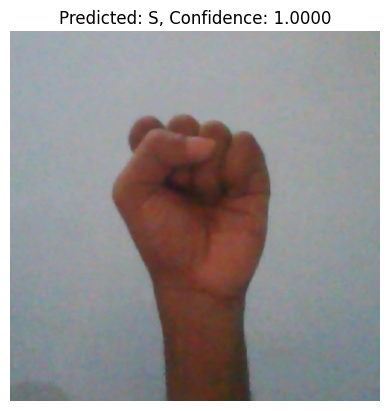

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Load the pre-trained model
# Class labels (example, replace with your actual labels)
class_labels = sorted(os.listdir('/content/ASL_Dataset/Train'))  # Update with actual class names

# Function to preprocess and predict the image
def preprocess_and_predict(img_path, model, normalization='scale'):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the shape (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image array
    if normalization == 'scale':
        img_array = img_array / 255.0  # Scale to [0, 1]
    elif normalization == 'zero_center':
        img_array = (img_array - 127.5) / 127.5  # Zero center [-1, 1]
    elif normalization == 'mean_subtraction':
        mean = np.array([123.68, 116.779, 103.939])  # Example mean values
        img_array -= mean  # Subtract mean
    elif normalization == 'reduce':
        img_array = img_array - 1

    # Predict using the model
    predictions = model.predict(img_array)

    # Get the highest probability
    top_1_idx = np.argmax(predictions[0])  # Index of the highest probability
    top_1_class = class_labels[top_1_idx]  # Corresponding class label
    top_1_confidence = predictions[0][top_1_idx]  # Highest probability value

    return top_1_class, top_1_confidence

# Path to the image
image_path = '/content/ASL_Dataset/Test/S/3001.jpg'
# Get the top-1 prediction
predicted_class, confidence_score = preprocess_and_predict(image_path, model, normalization='reduce')

# Print the result
print(f"Predicted class: {predicted_class} with confidence: {confidence_score:.4f}")

# Visualize the input image (optional)
plt.imshow(image.load_img(image_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_class}, Confidence: {confidence_score:.4f}")
plt.show()


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def capture_image_from_webcam(filename='captured_image.jpg'):
    # JavaScript to take a photo
    js = Javascript('''
    async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);
        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Capture the photo
        await new Promise((resolve) => capture.onclick = resolve);
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg').replace('data:image/jpeg;base64,', '');
    }
    ''')

    display(js)

    # Execute JavaScript to capture image
    data = eval_js('takePhoto()')

    # Decode the base64 image
    img_bytes = b64decode(data)
    img_array = np.frombuffer(img_bytes, dtype=np.uint8)

    # Decode image
    img = cv2.imdecode(img_array, flags=cv2.IMREAD_COLOR)

    # Save the image
    cv2.imwrite(filename, img)

    return filename

# Capture the image and save it
filename = capture_image_from_webcam('captured_image.jpg')
print(f'Image saved as {filename}')


<IPython.core.display.Javascript object>

Image saved as captured_image.jpg


1/1 [==============================] - 0s 61ms/step
Predicted class: G with confidence: 0.4999


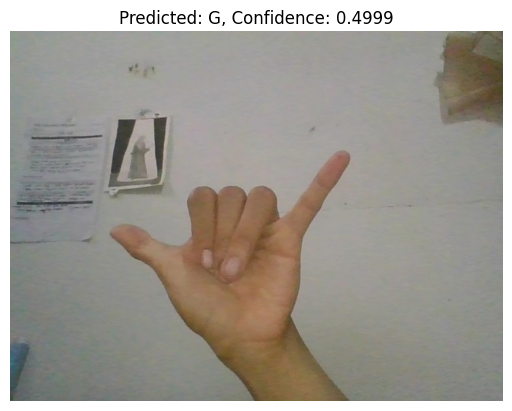

In [ ]:
image_path = filename
# Get the top-1 prediction
predicted_class, confidence_score = preprocess_and_predict(image_path, model, normalization=None)

# Print the result
print(f"Predicted class: {predicted_class} with confidence: {confidence_score:.4f}")

# Visualize the input image (optional)
plt.imshow(image.load_img(image_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_class}, Confidence: {confidence_score:.4f}")
plt.show()